# Feature Engineering - importance study

In [1]:
import librosa
import librosa.display
from librosa.core import load
import numpy as np
import pandas as pd
import glob
import os, sys
import matplotlib.pyplot as plt
import time
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
VERSION = 4

### Load Data

In [4]:
df_joint_train = pd.read_csv(f'./features/cache_all_features_train_V{VERSION}.csv')
feature_column_names = [i for i in df_joint_train.columns \
                        if i not in ['file_path','renamed_file_path','split','sentiment_value','emotional_category']]

df_joint_test = pd.read_csv(f'./features/cache_all_features_test_V{VERSION}.csv')

print("shape of train set: ", df_joint_train.shape)
print("shape of test  set: ", df_joint_test.shape)

shape of train set:  (10981, 1550)
shape of test  set:  (1180, 1550)


In [6]:
### generate selected features 
input = {"mfcc_mean": 20, "zcr":5, "rms":5}
def generate_selected_features_by_type(feature_column_names,input,stats,number=1):
    selected_result = []
    for name in feature_column_names:
        if input+"_"+stats in name:
            selected_result.append(name)
    if number < len(selected_result):
        selected_result = selected_result[:number]
    return selected_result

# example to take mfcc 20 mean & std and zcr all 5 stats and all pitch features
selected_feature_names = generate_selected_features_by_type(feature_column_names,"mfcc","mean",20)
selected_feature_names += generate_selected_features_by_type(feature_column_names,"mfcc","std",20)
selected_feature_names += generate_selected_features_by_type(feature_column_names,"zcr","",5)
selected_feature_names += generate_selected_features_by_type(feature_column_names,"pitch","",10)
print(selected_feature_names)

['mfcc_mean_1', 'mfcc_mean_2', 'mfcc_mean_3', 'mfcc_mean_4', 'mfcc_mean_5', 'mfcc_mean_6', 'mfcc_mean_7', 'mfcc_mean_8', 'mfcc_mean_9', 'mfcc_mean_10', 'mfcc_mean_11', 'mfcc_mean_12', 'mfcc_mean_13', 'mfcc_mean_14', 'mfcc_mean_15', 'mfcc_mean_16', 'mfcc_mean_17', 'mfcc_mean_18', 'mfcc_mean_19', 'mfcc_mean_20', 'mfcc_std_1', 'mfcc_std_2', 'mfcc_std_3', 'mfcc_std_4', 'mfcc_std_5', 'mfcc_std_6', 'mfcc_std_7', 'mfcc_std_8', 'mfcc_std_9', 'mfcc_std_10', 'mfcc_std_11', 'mfcc_std_12', 'mfcc_std_13', 'mfcc_std_14', 'mfcc_std_15', 'mfcc_std_16', 'mfcc_std_17', 'mfcc_std_18', 'mfcc_std_19', 'mfcc_std_20', 'zcr_mean', 'zcr_median', 'zcr_std', 'zcr_p10', 'zcr_p90', 'Pitch_relative_min_pitch_time', 'Pitch_relative_max_pitch_time', 'Pitch_mean_absolute_pitch_slope', 'Pitch_pitch_slope_without_octave_jumps']


In [ ]:
# # REF: previous study selected prosody features
# selected_spect = ['Spectrum_band_energy_difference','Spectrum_band_density_difference','Spectrum_center_of_gravity_spectrum','Spectrum_skewness_spectrum','Spectrum_kurtosis_spectrum', 'Spectrum_stddev_spectrum','Spectrum_band_density', 'Spectrum_band_energy']
# selected_formant = ['Formant_f1_mean','Formant_f1_median','Formant_f3_mean','Formant_fitch_vtl','Formant_mff','Formant_formant_dispersion']
# selected_GNE = ['GNE_max_gne', 'GNE_stddev_gne', 'GNE_mean_gne', 'GNE_sum_gne']
# selected_pitch = ['Pitch_pitch_slope_without_octave_jumps', 'Pitch_q3_pitch','Pitch_stddev_pitch', 'Pitch_mean_absolute_pitch_slope','Pitch_mean_pitch', 'Pitch_max_pitch', 'Pitch_q1_pitch', 'Pitch_min_pitch']
# selected_intensity = ['Intensity_max_intensity', 'Intensity_q3_intensity','Intensity_median_intensity', 'Intensity_mean_intensity', 'Intensity_stddev_intensity','Intensity_relative_max_intensity_time']
# selected_HNR = ['HNR_stddev_hnr', 'HNR_mean_hnr','HNR_relative_min_hnr_time','HNR_max_hnr']
# selected_prosody = selected_spect + selected_formant +selected_GNE + selected_HNR + selected_intensity + selected_pitch + ['Local Jitter','Local Shimmer']

## Feature Importance Analysis by Random Forest

In [7]:
'''as train test split from beginning, no longer need to call train_test_split'''

X_train = df_joint_train[feature_column_names]
y_train_s = df_joint_train['sentiment_value']
y_train_e = df_joint_train['emotional_category']

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_e_num = label_encoder.fit_transform(y_train_e)

X_test = df_joint_test[feature_column_names]
y_test_s = df_joint_test['sentiment_value']
y_test_e = df_joint_test['emotional_category']

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_test_e_num = label_encoder.fit_transform(y_test_e)

### Sentiment 3-class

In [8]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train_s)
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_s,predictions))

              precision    recall  f1-score   support

          -1       0.78      0.80      0.79       748
           0       0.55      0.56      0.56       183
           1       0.59      0.53      0.56       249

    accuracy                           0.71      1180
   macro avg       0.64      0.63      0.64      1180
weighted avg       0.71      0.71      0.71      1180



              precision    recall  f1-score   support

          -1       0.74      0.97      0.84       748
           0       0.84      0.41      0.55       183
           1       0.93      0.38      0.54       249

    accuracy                           0.76      1180
   macro avg       0.84      0.59      0.64      1180
weighted avg       0.79      0.76      0.73      1180

[[728  13   7]
 [108  75   0]
 [153   1  95]]


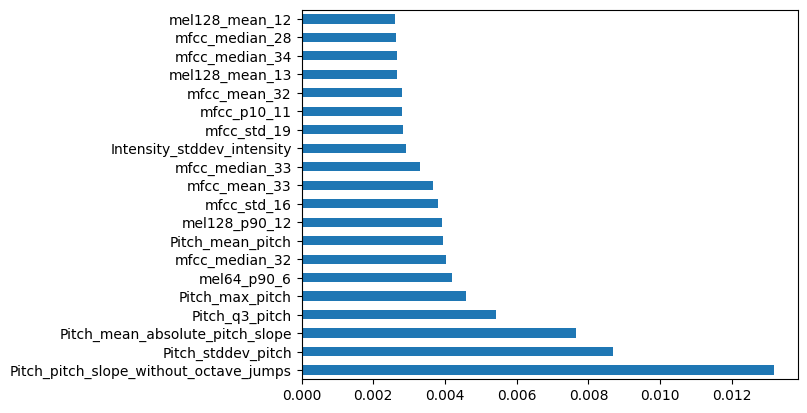

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier()
clf.fit(X_train, y_train_s)
predictions = clf.predict(X_test) 
# Evaluate the model
print(classification_report(y_test_s, predictions))
print(confusion_matrix(y_test_s, predictions))
# Visualize feature importances
feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feature_importances.nlargest(20).plot(kind='barh')
plt.show()

### Emotion 8-classes

In [7]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train_e)
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_e,predictions))

              precision    recall  f1-score   support

       Anger       0.60      0.55      0.57       187
    Calmness       0.54      0.88      0.67        16
     Disgust       0.41      0.37      0.39       187
        Fear       0.43      0.44      0.44       187
   Happiness       0.42      0.41      0.42       187
  Neutrality       0.53      0.49      0.50       167
     Sadness       0.50      0.58      0.54       187
    Surprise       0.62      0.73      0.67        62

    accuracy                           0.49      1180
   macro avg       0.51      0.55      0.52      1180
weighted avg       0.49      0.49      0.49      1180



              precision    recall  f1-score   support

       Anger       0.73      0.84      0.78       187
    Calmness       0.46      1.00      0.63        16
     Disgust       0.47      0.43      0.45       187
        Fear       0.62      0.48      0.54       187
   Happiness       0.69      0.50      0.58       187
  Neutrality       0.61      0.61      0.61       167
     Sadness       0.55      0.74      0.63       187
    Surprise       0.88      0.82      0.85        62

    accuracy                           0.62      1180
   macro avg       0.63      0.68      0.63      1180
weighted avg       0.62      0.62      0.61      1180

[[157   0  14   4  10   1   1   0]
 [  0  16   0   0   0   0   0   0]
 [ 12   2  81  14  13  30  33   2]
 [ 16   0  20  90   8   9  43   1]
 [ 31   4  25  16  93   7   8   3]
 [  0   6  19   8   6 102  26   0]
 [  0   7   9  12   1  18 139   1]
 [  0   0   4   2   3   1   1  51]]


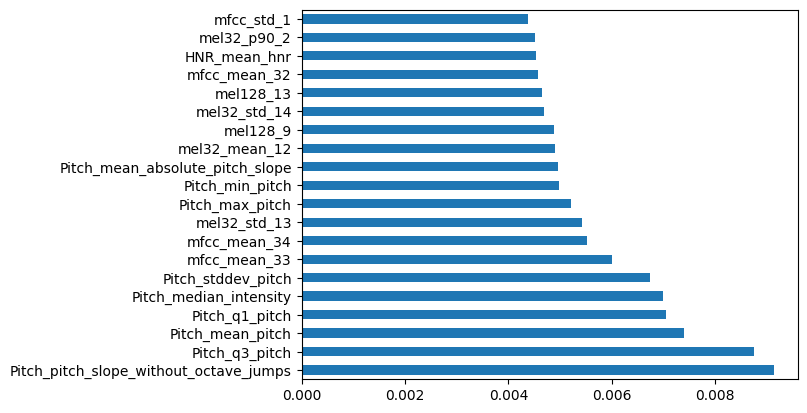

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize a Random Forest classifier
clf = RandomForestClassifier()

# Train the classifier
clf.fit(X_train, y_train_e)

# Predict on the test set
predictions = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test_e, predictions))
print(confusion_matrix(y_test_e, predictions))

# Visualize feature importances
feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feature_importances.nlargest(20).plot(kind='barh')
plt.show()